In [30]:
import pandas as pd; from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer ;from sklearn.mixture import GaussianMixture; import warnings; warnings.filterwarnings('ignore');import optuna ; import numpy as np;from sklearn.decomposition import PCA;import seaborn as sns
import matplotlib.pyplot as plt;import matplotlib.font_manager as fm;plt.rc('font', family='Malgun Gothic')  ;plt.rc('axes', unicode_minus=False)     

In [31]:
df = pd.read_csv(r'C:\Users\rla\잡다\군집0823_02.csv',encoding='cp949');df

,국가명,거리,시차,인당GDP,인구,교민수,oda,대한국무역(M),웰첼거리,종교유사도,피식민지,신용도,FTA,영어,해상교역,법치주의
0,Azerbaijan,6.45,5.0,7125.9,1015.4,160,44098719,24,0.24,0.36,0,0.50,0,0.0,0,-0.6
1,Jordan,8.00,6.0,4455.5,1143.9,550,96429143,82,0.43,0.37,1,0.40,0,0.5,1,0.3
2,Kazakhstan,4.55,4.0,12918.9,2033.0,119542,11138348,560,0.20,0.62,0,0.55,0,0.5,0,-0.4
3,Uzbekistan,4.88,4.0,2849.5,3565.2,117270,252468944,245,0.33,0.47,0,0.40,0,0.0,0,-0.8
4,Turkey,7.73,6.0,13105.7,8532.6,2700,30913780,1043,0.31,0.32,0,0.40,1,0.0,1,-0.5
5,Mexico,12.03,15.0,13790.0,12974.0,13158,12546549,1980,0.14,0.74,0,0.60,0,0.0,1,-0.8
6,Brazil,17.54,12.0,10294.9,21114.1,1723,7597109,1291,0.22,0.81,0,0.45,0,0.5,1,-0.3
7,Argentina,19.44,12.0,14187.5,4553.8,22000,2312254,207,0.14,0.82,0,0.15,0,0.5,1,-0.4
8,Peru,16.03,14.0,7906.6,3384.6,1230,59666352,362,0.19,0.75,0,0.55,1,0.0,1,-0.5
9,Colombia,14.83,14.0,6947.4,5232.1,857,237578597,184,0.23,0.80,0,0.45,1,0.0,1,-0.5


In [32]:
df['시공간거리'] = (0.8 * np.log1p(df.거리) + 0.2 * np.log1p(df.시차)).round(2)
df['관계강도'] =((0.5 * np.log1p(df.교민수)) + (0.5 * np.log1p(df.oda))).round(2)
df['문화유사지수'] =  (1-df.웰첼거리) + df.종교유사도 + df.피식민지
df['무역용이도'] = df.신용도 +  df.FTA +  df.영어 +   df.해상교역 + ( df.법치주의/2)
df = df.drop(['거리','시차','교민수','oda','웰첼거리','종교유사도','피식민지','신용도','FTA','영어','해상교역','법치주의'],axis=1)

scaling_needed = df[['인당GDP','인구','대한국무역(M)']]
scaler = MinMaxScaler()
scaling_needed[:] = scaler.fit_transform(scaling_needed)
x = pd.concat([df[['시공간거리','관계강도','문화유사지수','무역용이도']],scaling_needed],axis=1).round(2)

bic = [GaussianMixture(i,random_state=1,n_init=10).fit(x).bic(x) for i in range(3,7)];bic

[np.float64(17.027370953654668),
 np.float64(-85.0404527660333),
 np.float64(-185.29986741224582),
 np.float64(-238.69271000602964)]

[np.float64(-9.460721068027567),
 np.float64(-177.71502667564488),
 np.float64(-293.41641544841843),
 np.float64(-341.17560516594835)]

	label	인당GDP	인구	대한국무역(M)	시공간거리	관계강도	문화유사지수	무역용이도	국가명
0	0	7687.5	4922.9	421.6	2.5	1.8	1.7	2.1	[Jordan, Turkey, Peru, Colombia, South Africa]
1	1	7631.4	2204.5	276.3	1.8	1.9	1.2	0.4	[Azerbaijan, Kazakhstan, Uzbekistan]
2	2	12757.5	12880.6	1159.3	2.8	1.8	1.6	1.2	[Mexico, Brazil, Argentina]
3	3	5667.5	34022.2	2665.5	1.5	2.0	2.2	3.1	[India, Indonesia, Thailand, Vietnam, Philippi...
4	4	3824.3	7641.6	183.8	2.1	1.7	2.0	1.2	[Morocco, Algeria, Tunisia, Egypt, Bangladesh]


In [33]:
df['label'] = GaussianMixture(5,random_state=1).fit(x).predict(x)
con1 = df.select_dtypes('number').groupby('label').mean().round(1)
con2 = df.groupby('label')['국가명'].apply(list).reset_index()
pd.merge(con1,con2,on='label')

,label,인당GDP,인구,대한국무역(M),시공간거리,관계강도,문화유사지수,무역용이도,국가명
0,0,7636.7,24683.3,1108.0,2.1,13.0,1.7,2.7,"[Jordan, Turkey, Peru, Colombia, India, Thaila..."
1,1,4321.1,16547.8,3302.7,1.4,15.5,2.5,3.1,"[Indonesia, Vietnam, Philippines]"
2,2,6092.7,6343.0,361.7,2.4,11.4,1.9,1.2,"[Azerbaijan, Brazil, Morocco, Algeria, Tunisia..."
3,3,9381.0,9632.2,649.6,2.2,13.3,1.7,1.2,"[Kazakhstan, Mexico, Argentina, Egypt, Banglad..."
4,4,2849.5,3565.2,245.0,1.7,15.5,1.1,0.0,[Uzbekistan]


In [34]:
df['label'] = GaussianMixture(6,random_state=1).fit(x).predict(x)
con1 = df.select_dtypes('number').groupby('label').mean().round(1)
con2 = df.groupby('label')['국가명'].apply(list).reset_index()
pd.merge(con1,con2,on='label')

,label,인당GDP,인구,대한국무역(M),시공간거리,관계강도,문화유사지수,무역용이도,국가명
0,0,8988.6,7183.2,515.1,2.6,12.3,1.7,2.0,"[Jordan, Turkey, Brazil, Argentina, Peru, Colo..."
1,1,4321.1,16547.8,3302.7,1.4,15.5,2.5,3.1,"[Indonesia, Vietnam, Philippines]"
2,2,5059.8,2655.8,110.5,2.3,11.3,1.8,0.8,"[Azerbaijan, Morocco, Algeria, Tunisia]"
3,3,8179.4,10901.8,760.2,2.0,13.5,1.7,1.2,"[Kazakhstan, Mexico, Egypt, Bangladesh]"
4,4,2849.5,3565.2,245.0,1.7,15.5,1.1,0.0,[Uzbekistan]
5,5,7014.0,51496.6,2028.3,1.6,13.5,2.0,3.3,"[India, Thailand, Malaysia]"


df['label'] = GaussianMixture(4,random_state=1).fit(x).predict(x)
con1 = df.select_dtypes('number').groupby('label').mean().round(1)
con2 = df.groupby('label')['국가명'].apply(list).reset_index()
pd.merge(con1,con2,on='label')

In [35]:
pca = PCA(2)
x1 = pca.fit_transform(x)
x1 = pd.DataFrame(x1)

In [36]:
x2= pd.concat([x1,df[['label','국가명']]],axis=1)

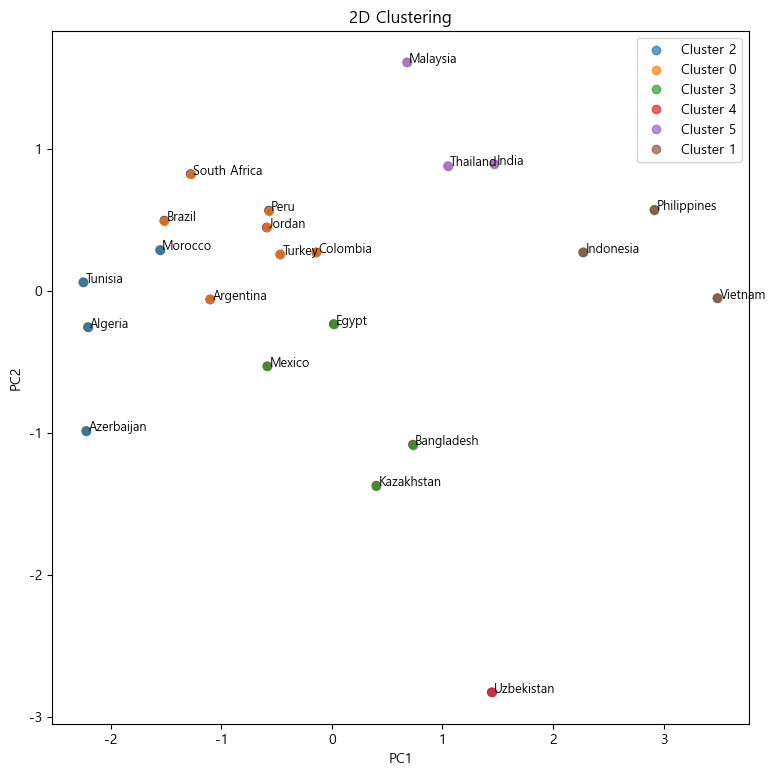

In [37]:
plt.figure(figsize=(9,9))

scatter = plt.scatter(
    x2[0], x2[1], 
    c=x2['label'], cmap='tab20b', 
    alpha=0.9
)


for i, row in x2.iterrows():
    plt.text(
        row[0]+0.02, row[1],   
        row['국가명'], 
        fontsize=9
    )

# PCA 로딩값 불러오기
features = ['인당GDP','인구','대한국무역(M)',
            '시공간거리','관계강도','문화유사지수','무역용이도']

loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1','PC2'], 
    index=features
)


for k in x2['label'].unique():
    subset = x2[x2['label'] == k]
    plt.scatter(
        subset[0], subset[1], 
        label=f"Cluster {k}", 
        alpha=0.7
    )
    
plt.title('2D Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [38]:
 loadings['PC1']

인당GDP      -0.252612
인구          0.877700
대한국무역(M)    0.096757
시공간거리       0.378966
관계강도       -0.056537
문화유사지수      0.036025
무역용이도       0.091430
Name: PC1, dtype: float64

In [39]:
loadings['PC2']

인당GDP       0.060911
인구         -0.395099
대한국무역(M)    0.241040
시공간거리       0.880594
관계강도        0.031793
문화유사지수      0.049833
무역용이도       0.056104
Name: PC2, dtype: float64

In [40]:
df.drop('label',axis=1)

,국가명,인당GDP,인구,대한국무역(M),시공간거리,관계강도,문화유사지수,무역용이도
0,Azerbaijan,7125.9,1015.4,24,1.96,11.34,1.12,0.20
1,Jordan,4455.5,1143.9,82,2.15,12.35,1.94,2.05
2,Kazakhstan,12918.9,2033.0,560,1.69,13.96,1.42,0.85
3,Uzbekistan,2849.5,3565.2,245,1.74,15.51,1.14,0.00
4,Turkey,13105.7,8532.6,1043,2.12,12.57,1.01,2.15
5,Mexico,13790.0,12974.0,1980,2.61,12.91,1.60,1.20
6,Brazil,10294.9,21114.1,1291,2.85,11.65,1.59,1.80
7,Argentina,14187.5,4553.8,207,2.93,12.33,1.68,1.45
8,Peru,7906.6,3384.6,362,2.81,12.51,1.56,2.30
9,Colombia,6947.4,5232.1,184,2.75,13.02,1.57,2.20


In [41]:
scaling_needed = df[['인당GDP','인구','대한국무역(M)']]
scaler = StandardScaler()
scaling_needed[:] = scaler.fit_transform(scaling_needed)
x = pd.concat([df[['시공간거리','관계강도','문화유사지수','무역용이도']],scaling_needed],axis=1).round(2)
bic1 = [GaussianMixture(i,random_state=1,n_init=10).fit(x).bic(x) for i in range(3,7)]

In [42]:
scaling_needed = df[['인당GDP','인구','대한국무역(M)']]
scaler = RobustScaler()
scaling_needed[:] = scaler.fit_transform(scaling_needed)
x = pd.concat([df[['시공간거리','관계강도','문화유사지수','무역용이도']],scaling_needed],axis=1).round(2)
bic2 = [GaussianMixture(i,random_state=1,n_init=10).fit(x).bic(x) for i in range(3,7)]

In [43]:
scaling_needed = df[['인당GDP','인구','대한국무역(M)']]
scaler = PowerTransformer(method='yeo-johnson')
scaling_needed[:] = scaler.fit_transform(scaling_needed)
x = pd.concat([df[['시공간거리','관계강도','문화유사지수','무역용이도']],scaling_needed],axis=1).round(2)
bic3 = [GaussianMixture(i,random_state=1,n_init=10).fit(x).bic(x) for i in range(3,7)]

In [44]:
bic_1 = pd.DataFrame(bic)
bic_2 = pd.DataFrame(bic1)
bic_3 = pd.DataFrame(bic2)
bic_4 = pd.DataFrame(bic3)
bic_frame = pd.concat([bic_1, bic_2, bic_3, bic_4], 
                      axis=1, 
                      keys=['minmax','standard','robust','yeo-johnson'])
bic_frame

,minmax,standard,robust,yeo-johnson
,0,0,0,0
0,17.027371,197.751885,310.153304,193.827988
1,-85.040453,-17.310803,178.904986,79.929353
2,-185.299867,-126.409497,68.633224,-161.901133
3,-238.692710,-149.314749,-44.157659,-223.951196
